#Procesamiento de datos del Visound

Esta rutina procesa y visualiza los datos que se generan con el programa visound.
La app va subiendo los datos a un servidor. Este servidor corre en una virtual machine en la compu de casa sobre un ubuntu server en el que instale un json-server. 
Esta rutina descarga los datos del servidor en su ultima version y los procesa para hacer una visualizacion de la actividad de los usuarios en forma grafica (un timeline de la actividad)

In [168]:
%matplotlib inline
import json
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [169]:
# Descargo la data y cargo el json a un objeto
db = json.load(urllib.urlopen('http://turintur.dynu.com/db'))

In [191]:
# Cargo la data de las sesiones en una tabla pandas
sessions = pd.concat((pd.DataFrame(x) for x in db['SessionEnviables']), ignore_index=True)
# Transformo la info de los logueos en formato unixtime a una fecha legible (en zona horaria GTM=0)
sessions['sessionDate'] = pd.to_datetime(sessions['id'], unit='ms')
# Cargo de los niveles
levels = pd.concat((pd.DataFrame(x) for x in db['LevelEnviables']), ignore_index=True)
# Carga las fechas en formato legible para todo lo que corresponda
levels['fechaEnvio'] = pd.to_datetime(levels['idEnvio'], unit='ms')
levels['fechaLevelStart'] = pd.to_datetime(levels['timeStarts'], unit='ms')
levels['fechaLevelExit'] = pd.to_datetime(levels['timeExit'], unit='ms')
# Carga la info de los trials
trials = pd.concat((pd.DataFrame(x) for x in db['TrialEnviables']), ignore_index=True)
# Convierte a fecha legible todo lo que tiene sentido
trials['fechaEnvio'] = pd.to_datetime(trials['idEnvio'], unit='ms')
trials['fechaTrialExit'] = pd.to_datetime(trials['timeExitTrial'], unit='ms')
trials['fechaTrialStart'] = pd.to_datetime(trials['timeTrialStart'], unit='ms')
# Ahora creamos la tabla con toda la info de cada toque y sound para lo que hay que buscar y concatenar la info fragmentada en cada trial
touch = pd.concat(pd.DataFrame(x) for x in list(trials['touchLog']) if x is not np.nan)
sounds = pd.concat(pd.DataFrame(x) for x in list(trials['soundLog']) if x is not np.nan)
# Crea una lista de usuario
usuarios = pd.DataFrame(pd.unique(list(sessions['userID'])),columns=['usuarios'])

# Con los datos ya cargados graficamos los resultados

La idea de esta seccion es hacer un analisis visual de los datos. Para eso vamos a armar un timeline donde vamos a mostrar con dibujos (lines, rectangulos, etc) lo que va pasando en el juego en funcion de diferentes criterios. Para un usuario cuando jugo, en usa sesion que paso, etc.

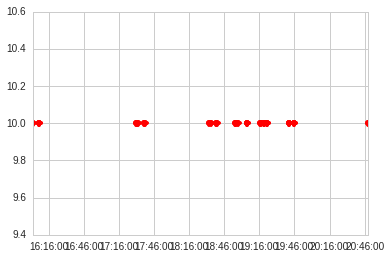

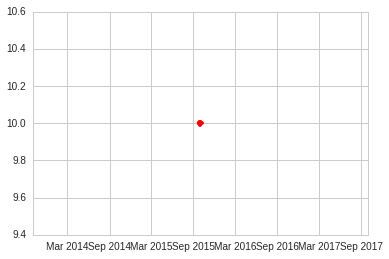

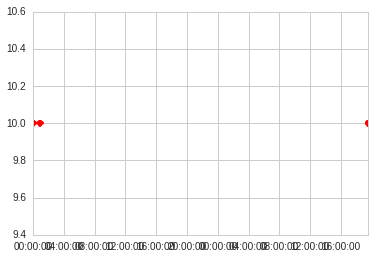

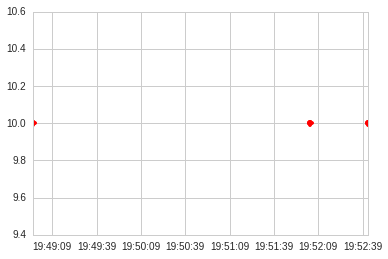

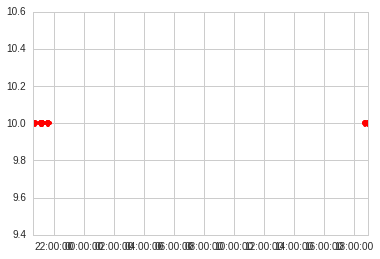

In [207]:
for usuario in usuarios['usuarios']:
    sesionesUsuario = sessions[sessions['userID']==usuario]
    fechas = sesionesUsuario['sessionDate']
    altura = np.ones(fechas.size)*10
    plt.figure()
    plt.plot(fechas,altura,'ro')

In [241]:
for usuario in usuarios['usuarios']:
    levelsUsuario = levels[levels['idUser']==usuario]
    for level in levelsUsuario.iterrows():
        plt.figure() # Crea la figura nueva
        if level['levelCompleted'] == True: # Elije el color
            color='g'
        else:
            color='r'
        plt.plot([level['fechaLevelStart'],level['fechaLevelStart']][5,5],color) # Agrega la linea horizontal de ese level
        plt.title = "Juego correspondiente al usuario" + usuario

    

TypeError: tuple indices must be integers, not str

In [237]:
level['levelCompleted'] 


TypeError: tuple indices must be integers, not str